In [ ]:
#Q1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (using breast cancer dataset as an example)
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000, random_state=16)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy: {accuracy:.2f}")


Logistic Regression model accuracy: 0.95


In [ ]:
#Q2.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model with L1 regularization
# Note: solver='liblinear' supports L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy with L1 regularization:", accuracy)


Model accuracy with L1 regularization: 0.956140350877193


In [ ]:
#Q3.Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficientsC

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Logistic Regression with L2 regularization (Ridge)
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, random_state=42)
clf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Print coefficients C (regularization strength)
print("Model coefficients:", clf.coef_)
print("Inverse regularization strength (C):", clf.C)


Model accuracy: 0.97
Model coefficients: [[ 1.08019387e+00  2.34193779e-01 -4.22027058e-01  2.85814344e-02
  -1.38673752e-01 -2.44088014e-01 -5.19286532e-01 -2.76231408e-01
  -2.14444037e-01 -3.98208027e-02 -1.25239345e-01  1.42761701e+00
   3.91365647e-01 -1.42343232e-01 -1.90407306e-02  3.58276533e-03
  -6.90809699e-02 -3.41921459e-02 -4.32964644e-02  5.56630236e-04
   1.10169289e-01 -5.12309657e-01 -3.99475580e-02 -1.35965155e-02
  -2.83119663e-01 -7.66819298e-01 -1.38779452e+00 -4.94652902e-01
  -7.23109808e-01 -1.05951256e-01]]
Inverse regularization strength (C): 1.0


In [ ]:
#Q4.C Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Logistic Regression with Elastic Net regularization
clf = LogisticRegression(
    penalty='elasticnet',
    solver='saga',           # 'saga' solver is required for elasticnet
    l1_ratio=0.5,            # Mix of L1 and L2 (0.5 = equal mix)
    max_iter=10000,
    random_state=42
)
clf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Elastic Net Logistic Regression model accuracy: {accuracy:.2f}")

# Print coefficients and regularization parameter C
print("Model coefficients:", clf.coef_)
print("Inverse regularization strength (C):", clf.C)


Elastic Net Logistic Regression model accuracy: 0.97
Model coefficients: [[ 1.37931285e-02  3.24159813e-03  7.06028836e-02  1.43311152e-02
   0.00000000e+00 -2.37568211e-04 -5.16107551e-04 -1.35319890e-04
   9.95277142e-06  0.00000000e+00  0.00000000e+00  5.49656673e-04
  -1.06359645e-03 -2.33493335e-02  0.00000000e+00  0.00000000e+00
  -1.32397406e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.43956244e-02 -2.13805997e-03  6.19866833e-02 -2.66023550e-02
   0.00000000e+00 -1.18073156e-03 -1.61100612e-03 -3.40086905e-04
  -5.01307848e-05  0.00000000e+00]]
Inverse regularization strength (C): 1.0


In [ ]:
#Q5.Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Iris dataset (3 classes)
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Train Logistic Regression with One-vs-Rest (OvR) strategy
model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Predict and print accuracy
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Print model coefficients for each class
print("Model coefficients (one row per class):\n", model.coef_)
print("Intercepts for each class:", model.intercept_)


Accuracy: 0.9666666666666667
Model coefficients (one row per class):
 [[-0.4078896   0.8079728  -2.22680017 -0.9310279 ]
 [-0.49101491 -1.87613062  0.73579443 -1.1074754 ]
 [-0.20477219 -0.40008971  2.68445835  2.08650642]]
Intercepts for each class: [  6.46137139   6.1833736  -14.05675793]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#Q6.Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Create a pipeline: standardize features then apply Logistic Regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

# Set up parameter grid
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logreg__penalty': ['l1', 'l2']
}

# GridSearchCV setup
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy: {:.2f}".format(grid.best_score_))

# Test set accuracy
test_accuracy = grid.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))


Best parameters: {'logreg__C': 1, 'logreg__penalty': 'l2'}
Best cross-validated accuracy: 0.98
Test set accuracy: 0.98


In [ ]:
#Q7.Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pipeline: standardize features and apply Logistic Regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
)

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using cross-validation
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

# Print the average accuracy
print("Stratified K-Fold Cross-Validation Accuracies:", scores)
print("Average Accuracy: {:.2f}".format(np.mean(scores)))


Stratified K-Fold Cross-Validation Accuracies: [0.97368421 0.95614035 0.96491228 0.99122807 0.99115044]
Average Accuracy: 0.98


In [ ]:
#Q8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Specify your CSV filename and target column name
csv_file = 'your_data.csv'      # <-- Change to your CSV file name
target_column = 'target'        # <-- Change to your target column name

# Load the dataset
df = pd.read_csv(csv_file)

# Drop rows with missing values (or use another strategy if you prefer)
df = df.dropna()

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical features to dummy/indicator variables
X = pd.get_dummies(X)

# Encode target if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy: {accuracy:.2f}")


In [ ]:
#Q9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import loguniform

# Load a sample dataset
X, y = load_iris(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Define the hyperparameter space
param_dist = {
    'C': loguniform(1e-4, 100),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
}

# Some solvers do not support all penalties; RandomizedSearchCV will skip invalid combinations

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42,
    error_score='raise'
)

# Fit to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated Accuracy: {:.4f}".format(random_search.best_score_))


In [20]:
#Q10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define OvO Logistic Regression
ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=1000, solver='lbfgs'))

# Fit model
ovo_clf.fit(X_train, y_train)

# Predict
y_pred = ovo_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"OvO Logistic Regression Accuracy: {accuracy:.4f}")


OvO Logistic Regression Accuracy: 1.0000


Logistic Regression Accuracy: 0.9737


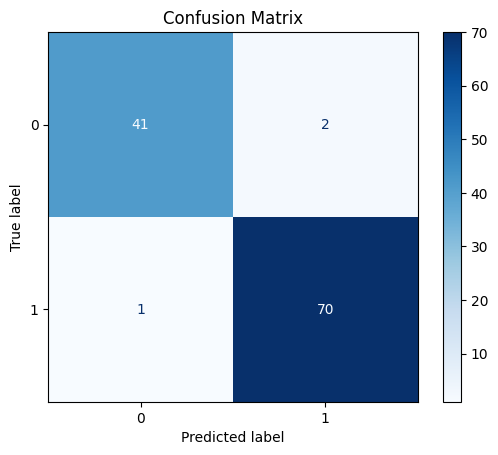

In [21]:
#Q11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load a binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Compute and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Q12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision Recall, and F1-ScoreM

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Load a binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [23]:
#Q13.Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performanceM

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Generate an imbalanced binary classification dataset
X, y = make_classification(
    n_samples=2000,
    n_features=10,
    n_classes=2,
    n_informative=6,
    weights=[0.9, 0.1],  # 90% of class 0, 10% of class 1
    random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression without class weights
model_no_weights = LogisticRegression(max_iter=1000)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

print("Performance WITHOUT class weights:")
print(classification_report(y_test, y_pred_no_weights))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_weights))

# Train Logistic Regression with class weights
model_with_weights = LogisticRegression(max_iter=1000, class_weight='balanced')
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

print("\nPerformance WITH class weights:")
print(classification_report(y_test, y_pred_with_weights))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_with_weights))


Performance WITHOUT class weights:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       365
           1       0.73      0.54      0.62        35

    accuracy                           0.94       400
   macro avg       0.84      0.76      0.80       400
weighted avg       0.94      0.94      0.94       400

Confusion Matrix:
 [[358   7]
 [ 16  19]]

Performance WITH class weights:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       365
           1       0.32      0.83      0.46        35

    accuracy                           0.83       400
   macro avg       0.65      0.83      0.68       400
weighted avg       0.92      0.83      0.86       400

Confusion Matrix:
 [[302  63]
 [  6  29]]


In [ ]:
#Q14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Drop columns with excessive missing data ('deck')
titanic_df = titanic_df.drop(columns=['deck'])

# Fill missing 'age' values with median
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

# Fill missing 'embarked' values with mode
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)

# Drop rows with any remaining missing values
titanic_df = titanic_df.dropna()

# Encode categorical variables
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df['embarked'] = titanic_df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = titanic_df[features]
y = titanic_df['survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [26]:
#Q15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scalingM

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Logistic Regression WITHOUT Scaling ---
model_no_scaling = LogisticRegression(max_iter=1000)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")

# --- Logistic Regression WITH Standardization ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression(max_iter=1000)
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")

# --- Comparison Output ---
if accuracy_with_scaling > accuracy_no_scaling:
    print("Feature scaling improved the model's accuracy.")
elif accuracy_with_scaling < accuracy_no_scaling:
    print("Feature scaling reduced the model's accuracy.")
else:
    print("Feature scaling made no difference in the model's accuracy.")



Accuracy without scaling: 0.9561
Accuracy with scaling: 0.9737
Feature scaling improved the model's accuracy.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC Score: 0.9977


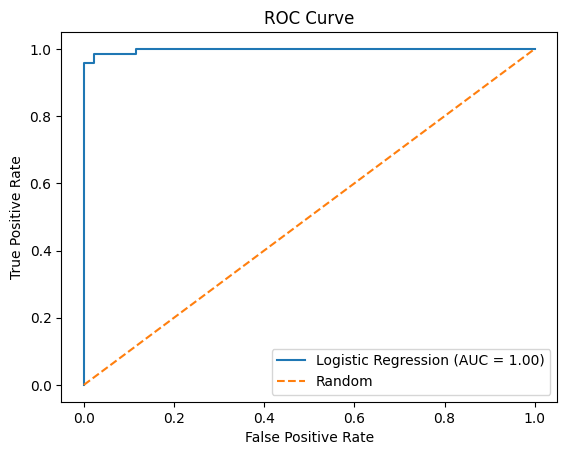

In [27]:
#Q16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC scoreM

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [28]:
#Q17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression with custom regularization strength (C=0.5)
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy with C=0.5: {accuracy:.4f}")


Logistic Regression Accuracy with C=0.5: 0.9649


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top 10 Important Features based on model coefficients:
mean radius             2.099812
worst concavity         1.571347
texture error           1.122469
worst compactness       1.004435
worst radius            0.966303
worst symmetry          0.840956
worst concave points    0.693514
mean concavity          0.691207
mean concave points     0.408107
mean compactness        0.379844
dtype: float64


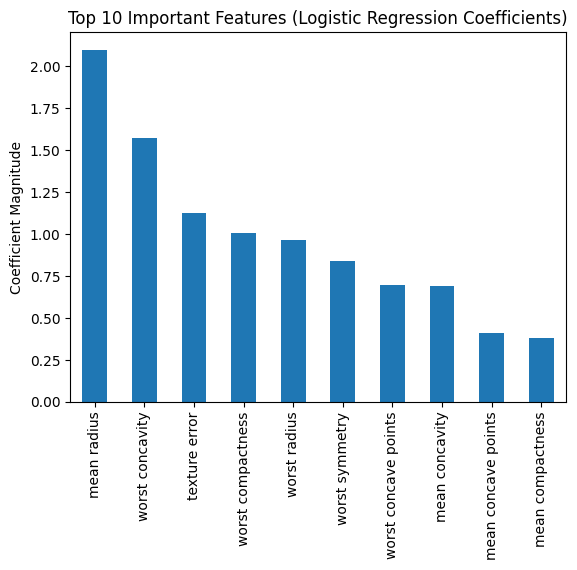

In [29]:
#Q18.Write a Python program to train Logistic Regression and identify important features based on model coefficients

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature importance (absolute value of coefficients)
coefs = model.coef_[0]
feature_importance = pd.Series(np.abs(coefs), index=feature_names).sort_values(ascending=False)

print("Top 10 Important Features based on model coefficients:")
print(feature_importance.head(10))

# Optional: Visualize feature importance
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Magnitude")
plt.show()


In [30]:
#Q19.Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance using Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.9053


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


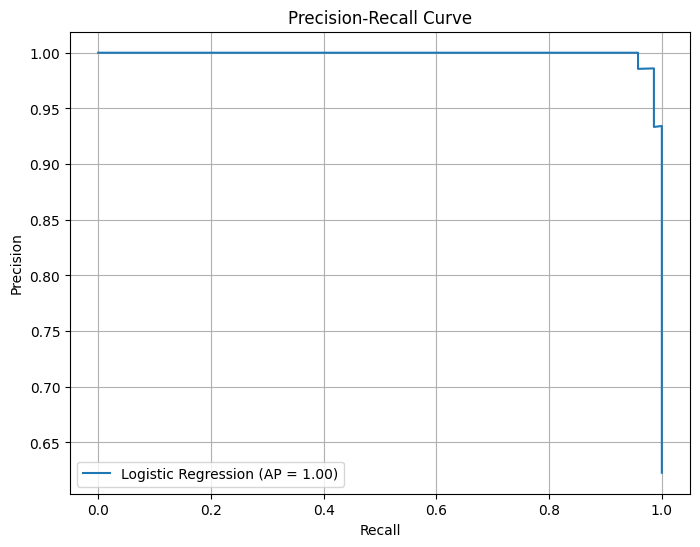

In [31]:
#Q20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio:

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load binary classification dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs and average precision
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
#Q21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)  # [1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # [2]

# Define solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

for solver in solvers:
    # Some solvers may require additional parameters for convergence
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[solver] = acc
    print(f"Accuracy with solver '{solver}': {acc:.4f}")

# Optional: Display results in a sorted manner
print("\nSolver accuracy comparison:")
for solver, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{solver}: {acc:.4f}")


Accuracy with solver 'liblinear': 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy with solver 'saga': 0.9649
Accuracy with solver 'lbfgs': 0.9561

Solver accuracy comparison:
saga: 0.9649
liblinear: 0.9561
lbfgs: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#Q22.Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

# Load the breast cancer dataset (binary classification)
X, y = load_breast_cancer(return_X_y=True)  # [1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # [2]

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance using Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.9068


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#Q23.Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scalingM

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)  # [1]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression on raw (unscaled) data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on raw data: {accuracy_raw:.4f}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on standardized data: {accuracy_scaled:.4f}")

# Compare results
if accuracy_scaled > accuracy_raw:
    print("Standardization improved accuracy.")
elif accuracy_scaled < accuracy_raw:
    print("Standardization reduced accuracy.")
else:
    print("Standardization made no difference in accuracy.")


Accuracy on raw data: 0.9561
Accuracy on standardized data: 0.9737
Standardization improved accuracy.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#Q24.Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)  # [1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # [3]

# Set up a grid of C values to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression (L2 penalty by default)
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Set up GridSearchCV for cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best C value
best_c = grid_search.best_params_['C']
print(f"Optimal C (regularization strength): {best_c}")

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with optimal C: {accuracy:.4f}")


Optimal C (regularization strength): 10
Test Accuracy with optimal C: 0.9561


In [36]:
#Q25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.joblib')
print("Model saved to 'logistic_regression_model.joblib'.")

# Load the model from the file
loaded_model = joblib.load('logistic_regression_model.joblib')
print("Model loaded from 'logistic_regression_model.joblib'.")

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of loaded model: {accuracy:.4f}")


Model saved to 'logistic_regression_model.joblib'.
Model loaded from 'logistic_regression_model.joblib'.
Accuracy of loaded model: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
